**<span style="color:#A03;font-size:14pt">
&#x1F528; Summary of Tutorial &#x1F528;
</span>** 

This tutorial will take a closer at Lennard-Jones potential using Argon dimer as an example to:

> **1.** Implementing the potential using [Numpy](https://numpy.org/).
>
> **2.** Plotting the potential and its terms using [Matplotlib](https://matplotlib.org/).
>
> **3.** Computing the minimum energy point using [Scipy](https://www.scipy.org/).
>
> **4.** Using [ASE](https://wiki.fysik.dtu.dk/ase/) to compute the potential and optimal geometry.
>
> **5.** Using [NGLView](http://nglviewer.org/nglview/latest/api.html) to visualize optimization!

**Notice:** 
- Make sure conda environment `chem413` is activated, and the Jupyter notebook is launched from that environment. The required libraries (numpy, matplotlib, scipy, ase, and nglview) are already installed in this environment.

# <font color=blue>Lennard-Jones Potential</font>

The Lennard-Jones (LJ) potential describes the pairwise interaction between two non-bonded atoms or molecules as a function of their distance $R_{AB}$ by

\begin{equation*}
E_\text{Lennord-Jones}(R_{AB}) = 4 \varepsilon_{AB} \left[ \left(\frac{\sigma_{AB}}{R_{AB}}\right)^{12} - \left(\frac{\sigma_{AB}}{R_{AB}}\right)^6 \right]
\end{equation*}

\begin{equation*}
\frac{d E_\text{Lennord-Jones}(R_{AB})}{d R_{AB}} = \frac{4 \varepsilon_{AB}}{R_{AB}} \left[-12\left(\frac{\sigma_{AB}}{R_{AB}}\right)^{12} + 6\left(\frac{\sigma_{AB}}{R_{AB}}\right)^6 \right]
\end{equation*}


The LJ potential consists of two parts, a steep replusive term and a smoother attractiv term, so let's take a closer look at each term!

In [ ]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

# <font color=blue>Numpy Implementation</font>

Use Numpy library to implement and evaluate the Lennard-Jones potential.

In [ ]:
#  Implement Lennard-Jones potential and its terms

def lennard_jones(r, sigma, epsilon):
    term = (sigma / r) ** 6
    return 4 * epsilon * (term ** 2 - term)

def lennard_jones_derivative(r, sigma, epsilon):
    term = (sigma / r) ** 6
    return (4 * epsilon / r) * (-12 * term **2 + 6 * term)

def lennard_jones_repulsive_term(r, sigma, epsilon):
    term = (sigma / r) ** 6
    return 4 * epsilon * term ** 2

def lennard_jones_attractive_term(r, sigma, epsilon):
    term = (sigma / r) ** 6
    return 4 * epsilon * -term

**<span style="color:#A03;font-size:18pt">
&#129349; Goal
</span>** 

Using the Lennard-Jones potential model for Argon dimer ($\varepsilon=0.997$ kJ/mol and $\sigma=3.40$ angstrom):

> - Compute and visualize its potential energy surface (which is 1-dimensional).
> 
> - Compute and visualize the repulsive & attractive terms of LJ potential individually.

To read more about [numpy.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html), [numpy.min](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.min.html), [numpy.max](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.max.html), and [numpy.zeros_like](https://numpy.org/doc/stable/reference/generated/numpy.zeros_like.html) refer to their documentation.

E(R = 4.0) =  -0.9368121408534456


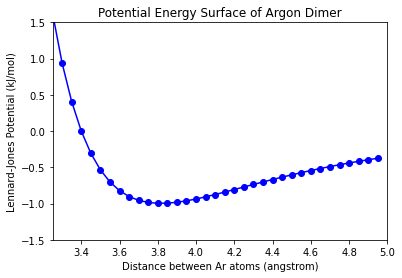

Min & Max of Potential =  -0.9963193288759974 9510885.006557075


In [ ]:
# Lennard-Jones parameters for Argon dimer
epsilon = 0.997   # kJ/mol
sigma = 3.40      # angstrom

# Compute LJ potential of Ar atoms at 4.0 angstrom
print("E(R = 4.0) = ", lennard_jones(4.0, sigma, epsilon))

# Compute the potential energy surface of Ar dimer
distance = np.arange(1.0, 5.0, 0.05)
potential = lennard_jones(distance, sigma, epsilon)
# print(distance.shape, distance.ndim, potential.shape, potential.ndim)

# Visualize the PES
plt.plot(distance, potential, marker='o', color='b')
plt.xlabel("Distance between Ar atoms (angstrom)")
plt.ylabel("Lennard-Jones Potential (kJ/mol)")
plt.title("Potential Energy Surface of Argon Dimer")
plt.xlim(3.25, 5.0)
plt.ylim(-1.5, 1.5)
plt.show()

print("Min & Max of Potential = ", np.min(potential), np.max(potential))

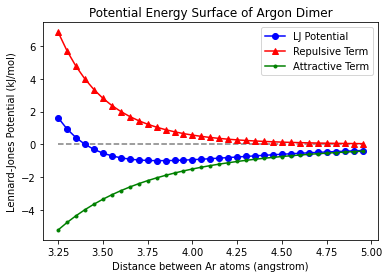

In [ ]:
# Compute the repulsive and attractive terms of LJ potential Ar dimer
distance = np.arange(3.25, 5.0, 0.05)
potential = lennard_jones(distance, sigma, epsilon)
r_term = lennard_jones_repulsive_term(distance, sigma, epsilon)
a_term = lennard_jones_attractive_term(distance, sigma, epsilon)

# Visualize the repulsive and attractive terms of LJ potential
plt.plot(distance, np.zeros_like(distance), color='0.5', linestyle='--')
plt.plot(distance, potential, marker='o', color='b', label='LJ Potential')
plt.plot(distance, r_term, marker='^', color='r', label='Repulsive Term')
plt.plot(distance, a_term, marker='.', color='g', label='Attractive Term')
plt.xlabel("Distance between Ar atoms (angstrom)")
plt.ylabel("Lennard-Jones Potential (kJ/mol)")
plt.title("Potential Energy Surface of Argon Dimer")

plt.legend()
plt.show()

# Note: The repulsive term (always positive value) is pretty steep.
#       The attractive term (always negative value) is smoother.

**<span style="color:#A03;font-size:18pt">
&#129300; Questions
</span>** 

>**1)** Which term drops faster as R gets larger?
>
>**2)** Which term is dominant when R is small and large?

# <font color=blue>Scipy Optimization</font>

Use [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) to find the minimum energy point of LJ potential.

**<span style="color:#A03;font-size:18pt">
&#129349; Goal
</span>**

> - Find the equilibrium structure of Argon dimer by minimizing the potential.
>
> - Implement the derivative of potential and use it for minimization.


In [ ]:
# Use scipy.optimize.minimize to find equilibrium distance of Ar atoms

result = minimize(lennard_jones,
                  x0=np.array([5.0]),
                  args=(sigma, epsilon),
                  # jac=lennard_jones_derivative,
                  method='TNC')
print(result)
print('---')
print('r_opt = ', result.x)
print('p_opt = ', result.fun, lennard_jones(result.x, sigma, epsilon))
print('d_opt = ', result.jac, lennard_jones_derivative(result.x, sigma, epsilon))

     fun: array([-0.997])
     jac: array([-2.76445535e-06])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 4
  status: 1
 success: True
       x: array([3.81637039])
---
r_opt =  [3.81637039]
p_opt =  [-0.997] [-0.997]
d_opt =  [-2.76445535e-06] [-2.80956465e-06]


**<span style="color:#A03;font-size:18pt">
&#129300; Questions
</span>** 

>**1)** Does the equilibrium distance match $R_{min}=\sqrt[6]{2}\times\sigma$ value?
>
>**2)** Does the equilibrium energy match $E(R_{min})=-\varepsilon$ value?

**<span style="color:#A03;font-size:14pt">
&#x270B; HANDS-ON Exercise!
</span>** 

> Having the derivative of Lennard-Jones potential with respect to atomic inter-atomic distance, and assuming that the atoms $A$ and $B$ are placed on $x$-axis, with coordinates $x_A$ and $x_B$, what is force exerted on each atom at a given $R_{AB}$ distance? [Hint: Use Chain Rule]

In [ ]:
# Compute derivative of potential


# Visualize the bond force


In [ ]:
# Compute force on each atom

**<span style="color:#A03;font-size:18pt">
&#129349; Goal
</span>** 

Write a class for Lennard-Jones potential model and make an instance of it to represent Ar dimer($\varepsilon=0.997$ kJ/mol and $\sigma=3.40$ angstrom).

E(R = 4.0) =  -0.9368121408534454


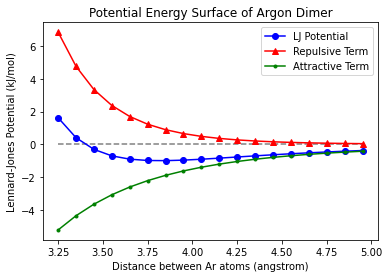

     fun: array([-0.997])
     jac: array([-2.06901462e-11])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 32
     nit: 10
  status: 1
 success: True
       x: array([3.81637096])


In [ ]:
# Implement Lennard-Jones potential as a class

class LennardJones():
    def __init__(self, sigma, epsilon):
        self.sigma = sigma
        self.epsilon = epsilon
    
    def attractive(self, r):
        term = (self.sigma / r)**6
        return 4 * self.epsilon * -term
    
    def repulsive(self, r):
        term = (self.sigma / r)**6
        return 4 * epsilon * term**2
    
    def potential(self, r):
        return self.attractive(r) + self.repulsive(r)
    
    def derivative(self, r):
        term = (self.sigma / r)**6
        return (4 * self.epsilon / r) * (-12 * term**2 + 6 * term)

argon_dimer = LennardJones(3.40, 0.997)

print("E(R = 4.0) = ", argon_dimer.potential(4.0))

distance = np.arange(3.25, 5.0, 0.1)
potential = argon_dimer.potential(distance)
# print(type(potential), potential.shape, potential.ndim)
r_term = argon_dimer.repulsive(distance)
a_term = argon_dimer.attractive(distance)

# Visualize the repulsive and attractive  terms of LJ potential
plt.plot(distance, np.zeros_like(distance), color='0.5', linestyle='--')
plt.plot(distance, potential, marker='o', color='b', label='LJ Potential')
plt.plot(distance, r_term, marker='^', color='r', label='Repulsive Term')
plt.plot(distance, a_term, marker='.', color='g', label='Attractive Term')
plt.xlabel("Distance between Ar atoms (angstrom)")
plt.ylabel("Lennard-Jones Potential (kJ/mol)")
plt.title("Potential Energy Surface of Argon Dimer")

plt.legend()
plt.show()

result = minimize(argon_dimer.potential,
                  x0=np.array([0.5]),
                  jac=argon_dimer.derivative,
                  method='TNC')
print(result)

# <font color=blue>ASE Library</font>

Use ASE library to evaluate the Lennard-Jones potential and perform geometry optimization.

Click [here](https://wiki.fysik.dtu.dk/ase/ase/calculators/others.html?highlight=lennardjones#ase.calculators.lj.LennardJones) for ASE documentation of Lennard-Jones potential.

In [ ]:
# imports from ASE
from ase import Atoms
from ase.calculators.lj import LennardJones
from ase.optimize import BFGS

E(R=4.0) =  -0.9368121346927656


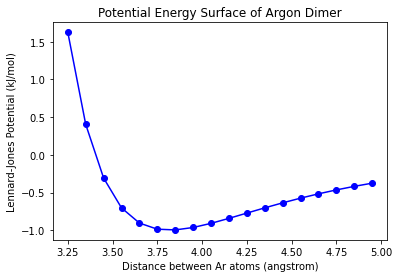

In [ ]:
# Using ASE, define Argon dimer with LJ potential
system = Atoms('Ar2', [[0.0, 0.0, 0.0], [4.0, 0.0, 0.0]])
system.calc = LennardJones(sigma=sigma, epsilon=epsilon, rc=100.0)

# compute LJ potential of Ar atoms at 4.0 angstrom
print("E(R=4.0) = ", system.get_potential_energy())

# Compute the potential energy surface of Ar dimer
distance = np.arange(3.25, 5.0, 0.1)
potential = []
for d in distance:
    system = Atoms('Ar2', [[0.0, 0.0, 0.0], [d, 0.0, 0.0]])
    system.calc = LennardJones(sigma=sigma, epsilon=epsilon, rc=100.0)
    potential.append(system.get_potential_energy())
# print(potential)

# Visualize the PES
plt.plot(distance, potential, marker='o', color='b')
plt.xlabel("Distance between Ar atoms (angstrom)")
plt.ylabel("Lennard-Jones Potential (kJ/mol)")
plt.title("Potential Energy Surface of Argon Dimer")
plt.show()

**<span style="font-size:14pt">
&#x1f3af; Does LJ potential computed from ASE match our Numpy implementation?
</span>**

In [ ]:
# Compute difference of LJ potential computed with ASE & Numpy
potential_numpy = lennard_jones(distance, sigma, epsilon)

print("Absolute Difference:")
print(abs(potential - potential_numpy))
print("")
print("Maximum Absolute Difference:")
print(max(abs(potential - potential_numpy)))

Absolute Difference:
[6.16067308e-09 6.16067558e-09 6.16067825e-09 6.16067908e-09
 6.16067997e-09 6.16067997e-09 6.16067997e-09 6.16067986e-09
 6.16067997e-09 6.16067997e-09 6.16068008e-09 6.16068019e-09
 6.16067986e-09 6.16068030e-09 6.16068008e-09 6.16068002e-09
 6.16068002e-09 6.16068024e-09]

Maximum Absolute Difference:
6.160680299238663e-09


**<span style="font-size:14pt">
&#x1f3af; What is the minimum energy point on the PES?
</span>**

In [ ]:
# Print intiail coordinates of atoms & their distance
system = Atoms('Ar2', [[0.0, 0.0, 0.0], [4.0, 0.0, 0.0]])
system.calc = LennardJones(sigma=sigma, epsilon=epsilon, rc=100.0)

print("Cartesian Coordinates:")
print(system.positions)
print("Distance of Atoms:")
print(system.get_all_distances())

# Print initial force vector of each atom
print("Atomic Force Vector:")
print(system.get_forces())

Cartesian Coordinates:
[[0. 0. 0.]
 [4. 0. 0.]]
Distance o Atoms:
[[0. 4.]
 [4. 0.]]
Atomic Force Vector:
[[ 0.55432802  0.          0.        ]
 [-0.55432802  0.          0.        ]]


> Refer to the [documentation of Atoms class](https://wiki.fysik.dtu.dk/ase/ase/atoms.html#ase.Atoms) for a complete list its attributes and methods.
>
> Refer to the [documentation of optimize module](https://wiki.fysik.dtu.dk/ase/ase/optimize.html) for further information!
>
> Refer to the [documentation of Trajectory](https://wiki.fysik.dtu.dk/ase/ase/io/trajectory.html) for further information!

In [ ]:
# Use ASE to optimize the structure of Ar dimer
system = Atoms('Ar2', [[0.0, 0.0, 0.0], [6.0, 0.0, 0.0]])
system.calc = LennardJones(sigma=sigma, epsilon=epsilon, rc=100.0)

opt = BFGS(system, trajectory='argon_dimer.traj')
opt.run(fmax=0.01)

# NOTE: This updates the coordinates of atoms in system

# NOTE: Convergence criterion is that the force on 
#       all individual atoms should be less than fmax

# NOTE: To monitor the progress of the optimization run, you can 
#       write the trajectory to a file.

      Step     Time          Energy         fmax
BFGS:    0 17:05:34       -0.127673        0.1233
BFGS:    1 17:05:34       -0.128108        0.1238
BFGS:    2 17:05:34       -0.138458        0.1352
BFGS:    3 17:05:34       -0.149765        0.1477
BFGS:    4 17:05:34       -0.162124        0.1615
BFGS:    5 17:05:34       -0.175640        0.1767
BFGS:    6 17:05:34       -0.190430        0.1934
BFGS:    7 17:05:34       -0.206621        0.2117
BFGS:    8 17:05:35       -0.224350        0.2318
BFGS:    9 17:05:35       -0.243768        0.2539
BFGS:   10 17:05:35       -0.265038        0.2781
BFGS:   11 17:05:35       -0.288331        0.3046
BFGS:   12 17:05:35       -0.313832        0.3333
BFGS:   13 17:05:35       -0.341731        0.3645
BFGS:   14 17:05:35       -0.372224        0.3982
BFGS:   15 17:05:35       -0.405504        0.4342
BFGS:   16 17:05:36       -0.441750        0.4723
BFGS:   17 17:05:36       -0.481118        0.5121
BFGS:   18 17:05:36       -0.523717        0.5529
B

True

In [ ]:
# Print optimized coordinates of atoms & their distance
print("Optimal Cartesian Coordinates:")
print(system.positions)
print("Optimal Distance of Atoms:")
print(system.get_all_distances())

# Print optimized force vector of each atom
print("Optimal Atomic Force Vector:")
print(system.get_forces())

Optimal Cartesian Coordinates:
[[1.09163324e+00 5.46547786e-17 1.33099696e-16]
 [4.90836676e+00 2.32331566e-18 4.07232385e-18]]
Optimal Distance of Atoms:
[[0.         3.81673353]
 [3.81673353 0.        ]]
Optimal Atomic Force Vector:
[[ 1.78515542e-03 -2.44763733e-20 -6.03484395e-20]
 [-1.78515542e-03  2.44763733e-20  6.03484395e-20]]


**<span style="font-size:14pt">
&#x1f3af; Visualize the optimization!
</span>** 

In [ ]:
from ase.io.trajectory import Trajectory

traj = Trajectory('argon_dimer.traj')
print(len(traj))

31


In [ ]:
from ase.visualize.ngl import view_ngl

view_ngl(traj)

/Users/Farnaz/anaconda3/envs/test2_chem413/lib/python3.6/site-packages/ase/io/jsonio.py:122: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  a = np.array(obj)
